<H1>Release Date and ROI </H1>

*Import appropriate packages.*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

*Import the data.*

In [3]:
df_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [4]:
df_dollars = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

*Convert strings to appropriate datatypes. The dates and monetary columns were all formatted as strings upon import.*

In [6]:
df_dollars['release_date']=pd.to_datetime(df_dollars['release_date'],format='%b %d, %Y')

In [47]:
df_dollars['productionbudget'] = df_dollars['production_budget'].str.replace('$','')
df_dollars['production-budget'] = df_dollars['productionbudget'].str.replace(',','')
df_dollars['production-budget'] = pd.to_numeric(df_dollars['production-budget'])

df_dollars['domesticgross'] = df_dollars['domestic_gross'].str.replace('$','')
df_dollars['domestic-gross'] = df_dollars['domesticgross'].str.replace(',','')
df_dollars['domestic-gross'] = pd.to_numeric(df_dollars['domestic-gross'])

df_dollars['worldwidegross'] = df_dollars['worldwide_gross'].str.replace('$','')
df_dollars['worldwide-gross'] = df_dollars['worldwidegross'].str.replace(',','')
df_dollars['worldwide-gross'] = pd.to_numeric(df_dollars['worldwide-gross'])
df_dollars.dtypes
df_clean = df_dollars.drop(['domesticgross','domestic_gross',
         'worldwide_gross','worldwidegross',
        'productionbudget','production_budget'], axis=1)

*Now that the tables are cleaned, I'll create a join on the 'title' and 'movie' columns. First I set them both as the index, then execute the join.*

In [45]:
df_mov = df_movies.set_index('title')
df_gross = df_clean.set_index('movie')
joined_df = df_mov.join(df_gross,how='inner',lsuffix = 'gross')
#need to choose period we are assessing then filter out old data

<AxesSubplot:xlabel='domestic-gross', ylabel='release_date'>

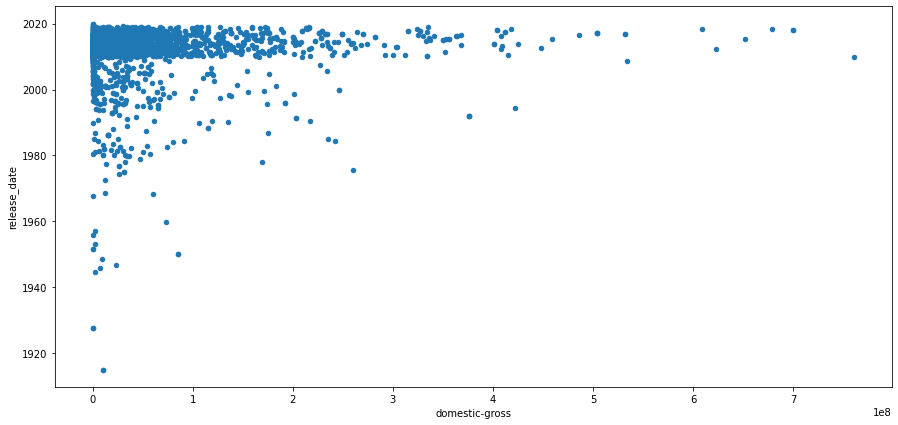

In [44]:
joined_df.plot('domestic-gross','release_date',figsize=(15,7),kind='scatter')
#recreate with subplots method, adjust the axes, etc

*Below this line is my scratch work.
Add release_day, release_month column df_movies*

In [4]:
df_movies.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [5]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies['release_day'] = df_movies['release_date'].dt.day_name()
df_movies['release_month'] = df_movies['release_date'].dt.month_name()

In [6]:
df_movies.dtypes

Unnamed: 0                    int64
genre_ids                    object
id                            int64
original_language            object
original_title               object
popularity                  float64
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
release_day                  object
release_month                object
dtype: object

In [15]:
df_movies['release_day'] = pd.to_datetime(df_movies['release_date'],format= '%b')

In [16]:
df_movies.groupby('release_day').sum()

,Unnamed: 0,id,popularity,vote_average,vote_count
release_day,,,,,
1930-04-29,14335,143,9.583,7.8,299
1933-01-21,21758,43148,2.292,5.6,23
1936-02-27,3580,263768,1.653,8.7,3
1939-01-19,26345,316707,0.600,7.3,3
1946-12-25,11192,887,9.647,7.8,243
...,...,...,...,...,...
2019-05-03,49303,1089166,11.144,19.0,4
2019-05-08,25006,500850,3.299,8.5,15
2019-05-17,73119,1308109,26.824,17.2,32
